In [3]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from analytics_combined import *
import pandas as pd

In [4]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

In [3]:
#Run this before anything else!

input_file_proj_17 = "../data/tile_placements_proj.csv"
input_file_proj_22 = "../data_2022/tile_placements_proj.csv"
input_file_proj_23 = "../data_2023/tile_placements_proj.csv"
#input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
#input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"

project_to_remove = {}
# js_filename = "../data/atlas.json"
js_filename_17 = "../data/atlas_complete.json"
js_filename_22 = "../data_2022/atlas/atlas.json"
js_filename_23 = "../data_2023/atlas/atlas.json"

locations_17 = store_locations(js_filename_17)
locations_22 = store_locations_22(js_filename_22)
locations_23 = store_locations_22(js_filename_23)

names_17, descriptions_17 = read_picture_names_and_descriptions_17(js_filename_17)
names_22, descriptions_22 = read_picture_names_and_descriptions(js_filename_22)
names_23, descriptions_23 = read_picture_names_and_descriptions(js_filename_23)

In [4]:
descriptions_17

{'0': 'Tux is the official mascot of the Linux operating system.',
 '1': '',
 '2': "In order to prove the point that reddit users are a cultured bunch, a group of them set out to recreate Leonardo da Vinci's Mona Lisa.",
 '3': 'Dwarf Fortress is a part construction and management simulation, part roguelike, indie video game created by Tarn and Zach Adams.',
 '4': "The void was an ever-expanding area of darkness, until it was filled with the Prism from the album art of Pink FLoyd's Dark Side of the Moon.",
 '5': 'Arch Linux is a distribution of the Linux operating system.',
 '6': '',
 '7': '',
 '8': 'Lego is a line of plastic construction toys made in Denmark.',
 '9': '',
 '10': 'Trogdor the Burninator is a figure from the Homestar Runner internet cartoon series.',
 '11': 'CH stands for Confoederatio Helvetica, which is latin for Swiss Confederation. It is used as the country code and for the Swiss Top Level Domain (TLD), which is .ch',
 '12': '',
 '13': 'After some early squabbling wit

In [7]:
project_to_remove = {}

input_file_proj_17 = "../data/tile_placements_proj.csv"
input_file_proj_22 = "/home/yw180/place/data_2022/tile_placements_proj.csv"
input_file_proj_23 = "/home/yw180/place/data_2023/tile_placements_proj.csv"
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_proj_17 = pixels_per_project(input_file_proj_17, project_to_remove)
pixels_proj_22 = pixels_per_project(input_file_proj_22, project_to_remove)
pixels_proj_23 = pixels_per_project(input_file_proj_23, project_to_remove)

In [6]:
def print_sorted_pixel_proj(pixel_proj, name, descriptions):
    sorted_pixel_proj = sorted(pixel_proj.items(), key=operator.itemgetter(1), reverse=True)

    #Top-10
    for i in range(10):
        proj = sorted_pixel_proj[i][0]
        pix = sorted_pixel_proj[i][1]
        n = name[str(proj)]
        desc = descriptions[str(proj)]

        print("#", i, ", project: ", n, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 2017

In [7]:
print_sorted_pixel_proj(pixels_proj_17, names_17, descriptions_17)

# 0 , project:  Rainbow Road , pixels:  88281 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 1 , project:  Entire Dutch Area , pixels:  33746 , 
desc:  Complete area built by Dutch subreddits 

# 2 , project:  Darth Plagueis The Wise , pixels:  21706 , 
desc:  One of the first additions to the map, this text of a meme from the prequel Star Wars movies started out as an uncoordinated attempt to write something everyone knew, and was refined to the masterpiece you see today. 

# 3 , project:  Hearts , pixels:  19020 , 
desc:  What started with a few red hearts quickly became over one hundred hearts bearing the colors of flags and other things. 

# 4 , project:  Flag of Sweden , pixels:  18801 , 
desc:   

# 5 , project:  Rainbow Road Core , pixels:  18309 , 
desc:  One of the earliest major faction on Place. They spread from here originally. After a while they began allowing others to build art in their spac

In [8]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_proj_17.values()))))

#STD

print("STD = ", np.std(np.array(list(pixels_proj_17.values()))))

AVG =  895.7259100642399
STD =  3117.2830701258076


# 2022

In [9]:
print_sorted_pixel_proj(pixels_proj_22, names_22, descriptions_22)

# 0 , project:  Flag of France , pixels:  124500 , 
desc:  France is a country in Western Europe.

This very large flag of France was made by the French Twitch sphere of streamers and their communities.

After battling against Spanish streamer Ibai for hours in the bottom-left corner of r/place (before the third space was opened), The French streamers, led by streamer and esports leader Kamet0, migrated to the newly opened blank space in the bottom left of the third space. The original area extended over the One Piece area to the north, but the French were happy to offer up the space to r/OnePiece during the final day, and even helped them build their art.

After the French streamers started putting down roots in the bottom left, building a huge French flag and a poorly-drawn Eiffel Tower, a coalition comprised of Spanish and North American streamers (Ibai, Rubius, xQc, Mizkif) started attacking them relentlessly, even overtaking a huge chunk of the north area to draw a huge kid + "RAT

In [10]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_proj_22.values()))))

#STD

print("STD = ", np.std(np.array(list(pixels_proj_22.values()))))

AVG =  639.7545345732437
STD =  2808.5690297384735


# 2023

In [11]:
print_sorted_pixel_proj(pixels_proj_23, names_23, descriptions_23)

# 0 , project:  Fuck Spez! , pixels:  4531824 , 
desc:  u/spez, real name Steve Huffman, is the CEO of Reddit. This "Fuck Spez" message was written in protest of the recent pricing changes to the Reddit API that have killed off many third-party Reddit apps, along with Spez's controversial responses to user outcry.

The phrase "Fuck Spez" appearing prominently at the end of the r/place edition, just minutes before the canvas was terminated, represents a last-minute, collaborative effort by multiple communities.

Despite the haste in its preparation, the phrase's appearance on the canvas attests to the power of collective action within the r/place event. Different communities came together in a swift and coordinated effort to make a statement - a testament to the bonds formed and the spirit of unity shared amongst Reddit users during this unique digital event. 

# 1 , project:  SPZ , pixels:  4075031 , 
desc:  At the end of the whiteout began on r/place the communitys unite to write FUCK

In [12]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_proj_23.values()))))

#STD

print("STD = ", np.std(np.array(list(pixels_proj_23.values()))))

AVG =  3594.210264635124
STD =  85166.76514617592


In [8]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count1, count2, count3, output_file_name):
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    ax.loglog(range(len(count1)), count1, color="#fa4d56", linewidth=2, linestyle='dashdot', label = "2017")
    ax.loglog(range(len(count2)), count2, color="#002d9c", linewidth=2, linestyle = 'dashed', label = "2022")
    ax.loglog(range(len(count3)), count3, color="#005d5d", linewidth=2, linestyle='dotted', label = "2023")
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_ylabel('icdf', fontsize=15)
    ax.tick_params(labelsize=10)
    ax.set_xlim(1,10000000)
    ax.legend(loc = 'upper right')
    #plt.title(label="Pixels Per Project", fontsize=12, font='serif')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count_1 = icdf(pixels_proj_17)
count_2 = icdf(pixels_proj_22)
count_3 = icdf(pixels_proj_23)

plot_updates_per_user_icdf(count_1, count_2, count_3, "../plots/pixel_per_Project_3_year.svg")

In [52]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count1, count2, count3, output_file_name):
    plt.clf()
    plt.figure(figsize=(4,3))
    ax = plt.subplot(111)
    ax.loglog(range(len(count1)), count1, color="#fa4d56",marker='o',markevery=0.1, linewidth=2,label = "2017")
    ax.loglog(range(len(count2)), count2, color="#002d9c", marker='x',markevery=0.1, linewidth=2, label = "2022")
    ax.loglog(range(len(count3)), count3, color="k", linewidth=2, label = "2023")
    ax.set_xlabel('# pixels', fontsize=15)
    ax.set_ylabel('icdf', fontsize=15)
    ax.tick_params(labelsize=10)
    ax.set_xlim(1,10000000)
    ax.legend(loc = 'upper right')
    #plt.title(label="Pixels Per Project", fontsize=12, font='serif')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

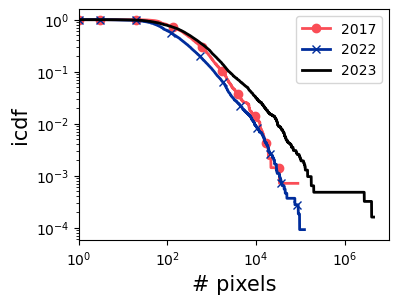

In [53]:
plot_updates_per_user_icdf(count_1, count_2, count_3, "../plots/pixel_per_Project_3_year.svg")

In [19]:
len(count_1)

88282

In [20]:
len(count_2)

124501